<a href="https://www.kaggle.com/code/larsmagnusson/itf31519-regression-analysis?scriptVersionId=110499306" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
# Load the dataset
dataset = pd.read_csv('/kaggle/input/insurance/insurance.csv')
# Show first 5 rows
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Show types of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Split into input and output
features = dataset.drop('charges',axis=1)
targets = dataset['charges']

# Encode categorical data using one-hot encoding
encoded_features = pd.get_dummies(features)

from sklearn.model_selection import train_test_split

# Split into train and test data (0.75/0.25)
train_features, test_features, train_targets, test_targets = train_test_split(encoded_features, targets)

In [5]:
# Show train inputs 
train_features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
94,64,31.30,2,1,0,0,1,0,0,0,1
446,60,29.64,0,0,1,1,0,1,0,0,0
476,24,28.50,0,0,1,0,1,1,0,0,0
732,24,30.10,3,1,0,1,0,0,0,0,1
961,29,25.90,0,1,0,1,0,0,0,0,1


In [6]:
# Show encoding
encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   sex_female        1338 non-null   uint8  
 4   sex_male          1338 non-null   uint8  
 5   smoker_no         1338 non-null   uint8  
 6   smoker_yes        1338 non-null   uint8  
 7   region_northeast  1338 non-null   uint8  
 8   region_northwest  1338 non-null   uint8  
 9   region_southeast  1338 non-null   uint8  
 10  region_southwest  1338 non-null   uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 41.9 KB


In [7]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(encoded_features, targets)

LinearRegression()

In [8]:
# Calculate and show the performance for training and test data 
(linear.score(train_features, train_targets), linear.score(test_features, test_targets))

(0.731052747901708, 0.7986113530181291)

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Create regression model with max depth 4 and fit it to our training data
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(encoded_features, targets)

DecisionTreeRegressor(max_depth=4)

In [10]:
# Calculate and show the performance for training and test data 
(tree.score(train_features, train_targets), tree.score(test_features, test_targets))

(0.8517124864167905, 0.9087194566569505)

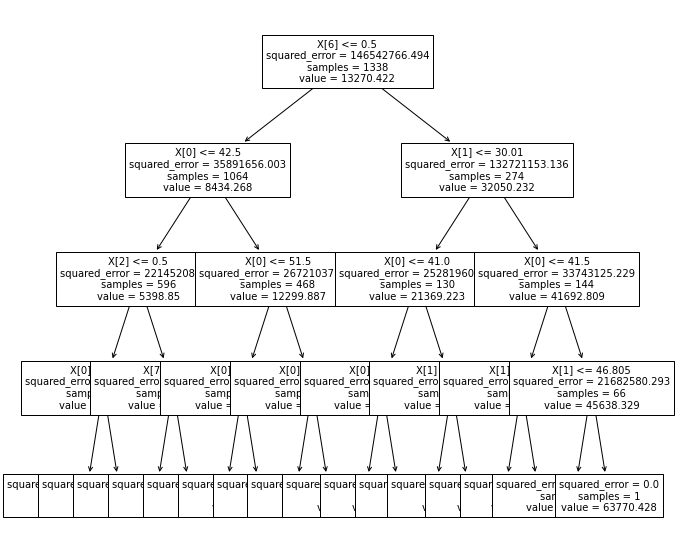

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Show our decision tree
plt.figure(figsize=(10,10))
plot_tree(tree,fontsize=10)
plt.show()


In [12]:
encoded_features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


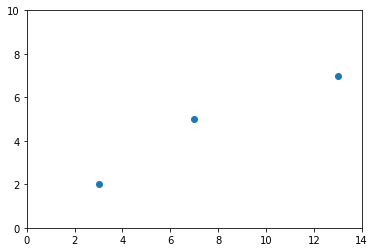

In [13]:
x = [3,7,13]
y = [2,5,7]

fig = plt.figure()
plt.ylim([0,10])
plt.xlim([0,14])
plt.scatter(x,y)
plt.savefig('linear_regression_data.png')
plt.show()

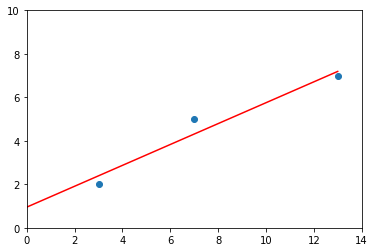

In [14]:
def f(x):
    return 0.48*x + 0.952

x_tic = range(0,14)
ys = [f(x) for x in x_tic]

fig = plt.figure()
plt.ylim([0,10])
plt.xlim([0,14])
plt.scatter(x,y)
plt.plot(x_tic, ys, color='red')
plt.savefig('linear_regression_solution.png')
plt.show()

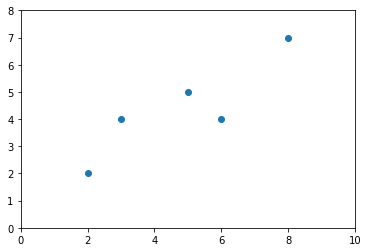

In [15]:
xs = [2,3,5,6,8]
ys = [2,4,5,4,7]

fig = plt.figure()
plt.ylim([0,8])
plt.xlim([0,10])
plt.scatter(xs,ys)
plt.savefig('cart1.png')
plt.show()

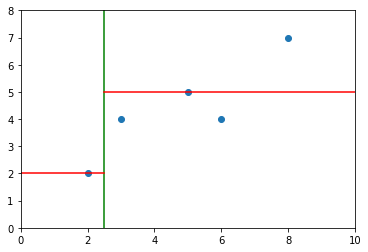

In [16]:
split = (xs[0]+xs[1])/2.0
avg1 = ys[0]
avg2 = sum(ys[1:])/len(ys[1:])

fig = plt.figure()
plt.ylim([0,8])
plt.xlim([0,10])
plt.scatter(xs,ys)
plt.plot([split, split], [0, 10], color='green')
plt.plot([0,split],[avg1, avg1], color='red')
plt.plot([split,10],[avg2, avg2], color='red')
plt.savefig('cart2.png')
plt.show()

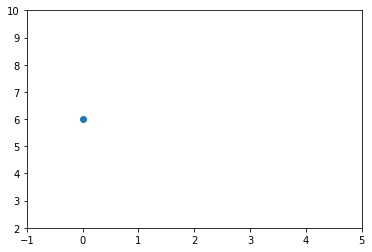

In [17]:
ssr2 = sum([(y-avg2)**2 for y in ys[1:]])
ssr = [ssr2]

fig = plt.figure()
plt.ylim([2,10])
plt.xlim([-1,5])
plt.scatter(range(0,len(ssr)),ssr)
plt.savefig('ssr1.png')
plt.show()

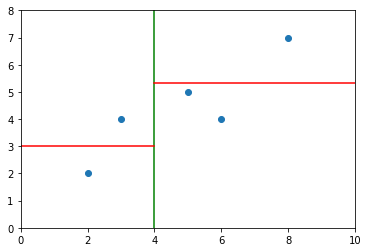

In [18]:
split = (xs[1]+xs[2])/2.0
avg1 = sum(ys[0:2])/len(ys[0:2])
avg2 = sum(ys[2:])/len(ys[2:])

fig = plt.figure()
plt.ylim([0,8])
plt.xlim([0,10])
plt.scatter(xs,ys)
plt.plot([split, split], [0, 10], color='green')
plt.plot([0,split],[avg1, avg1], color='red')
plt.plot([split,10],[avg2, avg2], color='red')
plt.savefig('cart3.png')
plt.show()

[6.0]
[6.0, 6.666666666666666]


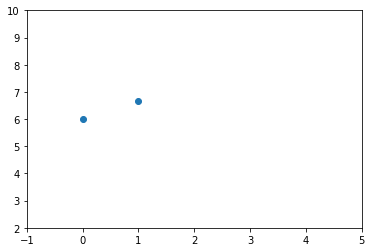

In [19]:
ssr1 = sum([(y-avg1)**2 for y in ys[0:2]])
ssr2 = sum([(y-avg2)**2 for y in ys[2:]])
print(ssr)
ssr.append(ssr1+ssr2)
print(ssr)

fig = plt.figure()
plt.ylim([2,10])
plt.xlim([-1,5])
plt.scatter(range(0,len(ssr)),ssr)
plt.savefig('ssr2.png')
plt.show()

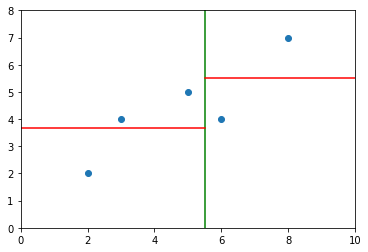

In [20]:
split = (xs[2]+xs[3])/2.0
avg1 = sum(ys[0:3])/len(ys[0:3])
avg2 = sum(ys[3:])/len(ys[3:])

fig = plt.figure()
plt.ylim([0,8])
plt.xlim([0,10])
plt.scatter(xs,ys)
plt.plot([split, split], [0, 10], color='green')
plt.plot([0,split],[avg1, avg1], color='red')
plt.plot([split,10],[avg2, avg2], color='red')
plt.savefig('cart4.png')
plt.show()

[6.0, 6.666666666666666]
[6.0, 6.666666666666666, 9.166666666666666]


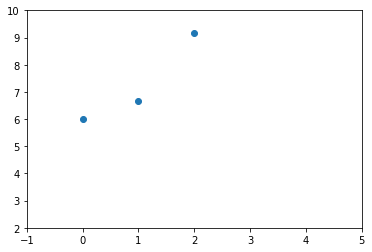

In [21]:
ssr1 = sum([(y-avg1)**2 for y in ys[0:3]])
ssr2 = sum([(y-avg2)**2 for y in ys[3:]])
print(ssr)
ssr.append(ssr1+ssr2)
print(ssr)

fig = plt.figure()
plt.ylim([2,10])
plt.xlim([-1,5])
plt.scatter(range(0,len(ssr)),ssr)
plt.savefig('ssr3.png')
plt.show()

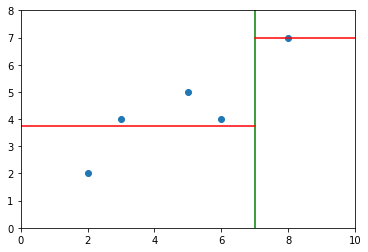

In [22]:
split = (xs[3]+xs[4])/2.0
avg1 = sum(ys[0:4])/len(ys[0:4])
avg2 = sum(ys[4:])/len(ys[4:])

fig = plt.figure()
plt.ylim([0,8])
plt.xlim([0,10])
plt.scatter(xs,ys)
plt.plot([split, split], [0, 10], color='green')
plt.plot([0,split],[avg1, avg1], color='red')
plt.plot([split,10],[avg2, avg2], color='red')
plt.savefig('cart5.png')
plt.show()

[6.0, 6.666666666666666, 9.166666666666666]
[6.0, 6.666666666666666, 9.166666666666666, 4.75]


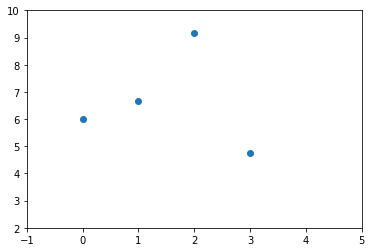

In [23]:
ssr1 = sum([(y-avg1)**2 for y in ys[0:4]])
ssr2 = sum([(y-avg2)**2 for y in ys[4:]])
print(ssr)
ssr.append(ssr1+ssr2)
print(ssr)

fig = plt.figure()
plt.ylim([2,10])
plt.xlim([-1,5])
plt.scatter(range(0,len(ssr)),ssr)
plt.savefig('ssr4.png')
plt.show()

[[2]
 [3]
 [5]
 [6]
 [8]]


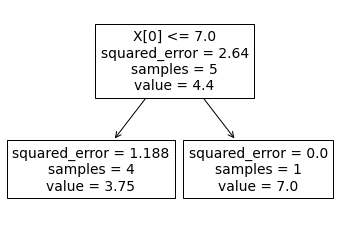

In [24]:
xsa = np.asarray(xs)

xsa = xsa[:,np.newaxis]
print(xsa)
tree2 = DecisionTreeRegressor(max_depth=1)
tree2.fit(xsa,ys)
plt.figure()
plot_tree(tree2)
plt.savefig('cart_tree1.png')